In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

This script writes out a python script <b> cscaling.py </b> that implements a series of classes that extends the "scalerel" base in the OpenQuake package. Target location of the generated script is the folder: <b> openquake/hazardlib/scalerel</b>.

The magnitude-area scaling considered is in simple form with a single coefficent such that,

log10(A) = Mag-C

where C ranges from 3.70 to 4.40, with step of 0.05. 


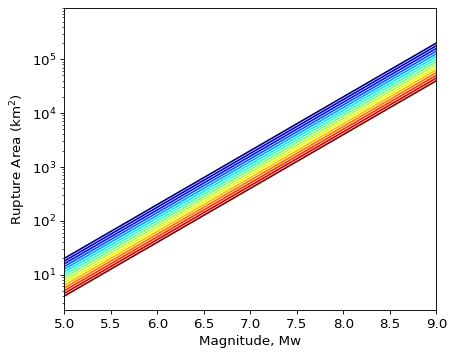

In [2]:
# quick look at the scaling relations
Cs = [round(c,2) for c in np.arange(3.7, 4.45, 0.05)]
mag = [round(m,2) for m in np.arange(5.0, 9.45, 0.05)]
mycol = cm.jet(np.linspace(0,1,len(Cs)))
plt.figure(figsize=(6, 5), dpi=80)
plt.rcParams.update({'font.size': 12})
i=0
for C in Cs:
    A = [10**(m-C) for m in mag]
    plt.semilogy(mag, A, '-', color=mycol[i])
    i+=1
plt.xlabel('Magnitude, Mw')
plt.ylabel('Rupture Area (km$^2$)');
plt.xlim([5, 9]);

In [3]:
def strtag(k):
    t = ('%.2f')%k
    t = t.replace('.', '_')
    return(t)
def gimme_scriptheader(Cs, fname=None, comment=None):
    if fname is None:
        fname = 'cscaling'
    threequotes = "\"\"\"\n"
    mytxt = threequotes
    mytxt = mytxt + "Module :mod:`openquake.hazardlib.scalerel." + fname + "` implements\n"
    for C in Cs:
        mytxt = mytxt + ":class: `" + fname + strtag(C) + "`\n"
    mytxt = mytxt + threequotes
    # mytxt = mytxt + "from numpy import power, log10\n"
    mytxt = mytxt + "from openquake.hazardlib.scalerel.base import BaseMSR\n"
    if comment is not None:
        mytxt = mytxt + threequotes + comment + threequotes
    return mytxt

def gimme_scaleclass(C, classname=None):
    if classname is None:
        classname = "cscaling"+ strtag(C)
    mytxt = "\nclass " + classname + "(BaseMSR):\n"
    mytxt = mytxt + "   def get_median_area(self, mag, rake):\n"
    mytxt = mytxt + "       return (10 ** (mag - %.2f)) \n" %C
    return mytxt

In [4]:
comment = "A set of classes that implement simple mag-area scaling: log10(A) = Mw -C\n"
comment = comment + "with coefficient C ranging from 3.70 to 4.40 (with step of 0.05).\n"
comment = comment + "These classes are named with suffix "
comment = comment + "that corresponds to the C. For example, 'Cscale3_70'.\n"

txt = gimme_scriptheader(Cs, comment=comment)
for C in Cs:
    txt = txt + gimme_scaleclass(C)
print(txt)
with open('cscaling.py', 'w') as f:
    f.write(txt)

"""
Module :mod:`openquake.hazardlib.scalerel.cscaling` implements
:class: `cscaling3_70`
:class: `cscaling3_75`
:class: `cscaling3_80`
:class: `cscaling3_85`
:class: `cscaling3_90`
:class: `cscaling3_95`
:class: `cscaling4_00`
:class: `cscaling4_05`
:class: `cscaling4_10`
:class: `cscaling4_15`
:class: `cscaling4_20`
:class: `cscaling4_25`
:class: `cscaling4_30`
:class: `cscaling4_35`
:class: `cscaling4_40`
"""
from openquake.hazardlib.scalerel.base import BaseMSR
"""
A set of classes that implement simple mag-area scaling: log10(A) = Mw -C
with coefficient C ranging from 3.70 to 4.40 (with step of 0.05).
These classes are named with suffix that corresponds to the C. For example, 'Cscale3_70'.
"""

class cscaling3_70(BaseMSR):
   def get_median_area(self, mag, rake):
       return (10 ** (mag - 3.70)) 

class cscaling3_75(BaseMSR):
   def get_median_area(self, mag, rake):
       return (10 ** (mag - 3.75)) 

class cscaling3_80(BaseMSR):
   def get_median_area(self, mag, rake):
       